The data set that we utilized for our Ica algorithm was obtained from The University of California Irvine's Machine Learning Repository. It was oginally collected by Oliver Roesler who used a 14 channel Emotive Epoc Neuroheadset to collect a continous 117 seconds of live EEG recording from a human. Video was also taken of the participants blinks while EEG recording was in progress. The database consists of 15 columns of data, the first 14 being vectors of microvolt measurements taken from the 14 different eeg channels ( which are labeled in code). A single vector represents the eeg microvolt measurement of a particular channel over time. The 15th column vector was obtained by recording the particpant's blinks and then inputing the state of the participants eye in the column vector. This eye state is labeled with a "0" when the participants eyes were open and a "1" representing a closed eye.


                                    References
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

Roesler Oliver, it12148 '@' lehre.dhbw-stuttgart.de , Baden-Wuerttemberg Cooperative State University (DHBW), Stuttgart, Germany

In [2]:
#imports
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
from sklearn.datasets import load_digits
from sklearn.decomposition import FastICA

#read in UCI EEG data rom https://archive.ics.uci.edu/ml/datasets/EEG+Eye+State#
#file EEG EYE STATE.arff then converted to csv
#with https://pulipulichen.github.io/jieba-js/weka/arff2csv/
# Data represents one 117 second measurement of 14 eeg channels from
# the Emotiv EEG Neuroheadset
# the 15th data colomn is the labels of the eye state. With o representing an open eye
# and 1 representing a closed eye. 
#"The features correspond to 14 EEG measurements from the headset,
#originally labeled AF3, F7, F3, FC5, T7, P, O1, O2, P8, T8, FC6, F4, F8, AF4, in that order."


#my_data is a 14980 row 15 column vector np array
my_data = genfromtxt('Dunn2.csv', delimiter=',')

In [3]:
my_data

array([[4.32923e+03, 4.00923e+03, 4.28923e+03, ..., 4.63590e+03,
        4.39385e+03, 0.00000e+00],
       [4.32462e+03, 4.00462e+03, 4.29385e+03, ..., 4.63282e+03,
        4.38410e+03, 0.00000e+00],
       [4.32769e+03, 4.00667e+03, 4.29538e+03, ..., 4.62872e+03,
        4.38923e+03, 0.00000e+00],
       ...,
       [4.27744e+03, 3.99077e+03, 4.24667e+03, ..., 4.59179e+03,
        4.33949e+03, 1.00000e+00],
       [4.28462e+03, 3.99179e+03, 4.25128e+03, ..., 4.59641e+03,
        4.35077e+03, 1.00000e+00],
       [4.28769e+03, 3.99744e+03, 4.26000e+03, ..., 4.59795e+03,
        4.35077e+03, 1.00000e+00]])

In [4]:
my_data.shape

(14980, 15)

In [5]:
#Because large outlier spikes existed in the data and it was clear that they were not
# part of the neural signals they need to be eliminated

#eliminate cols of outlier noise
my_data = np.delete(my_data,np.s_[10384:10388],axis=0)
my_data = np.delete(my_data,np.s_[11505:11508],axis=0)
my_data = np.delete(my_data,np.s_[897:900],axis=0)
my_data = np.delete(my_data,np.s_[13168:13171],axis=0)

In [6]:
my_data.shape

(14967, 15)

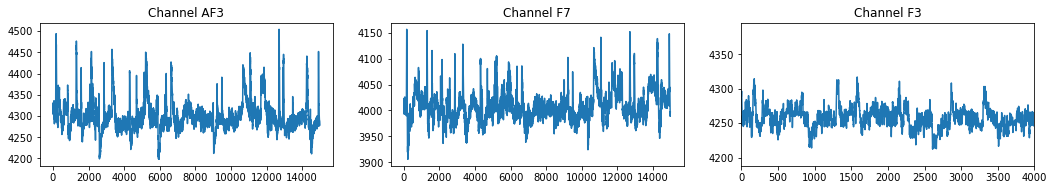

In [7]:
#Plot each individual EEG channel
# set X as a vector of numerical integer values from 1 to 14980
X = np.arange(0, 14967)
  
# set yi to be the ith column vector in my_data
Y0 = my_data[:,0]
Y1 = my_data[:,1]
Y2 = my_data[:,2]
Y3 = my_data[:,3]
Y4 = my_data[:,4]
Y5 = my_data[:,5]
Y6 = my_data[:,6]
Y7 = my_data[:,7]
Y8 = my_data[:,8]
Y9 = my_data[:,9]
Y10 = my_data[:,10]
Y11 = my_data[:,11]
Y12 = my_data[:,12]
Y13 = my_data[:,13]
Y14 = my_data[:,14]
  
# Initialise the subplot function using number of rows and columns with adjusted fig size
# set channels sequetially in subplot and graph
figure, axis = plt.subplots(1,3,figsize = (15,3))
  
# Channel AF3
plt.xlim(0,4000)
axis[0].plot(X, Y0)
axis[0].set_title("Channel AF3")
  # Channel F7
axis[1].plot(X, Y1)
axis[1].set_title("Channel F7")
  # Channel F3
axis[2].plot(X, Y2)
axis[2].set_title("Channel F3")
  
# Combine all the operations and display with appropriate spacing

plt.tight_layout(pad=2.0)
plt.show()

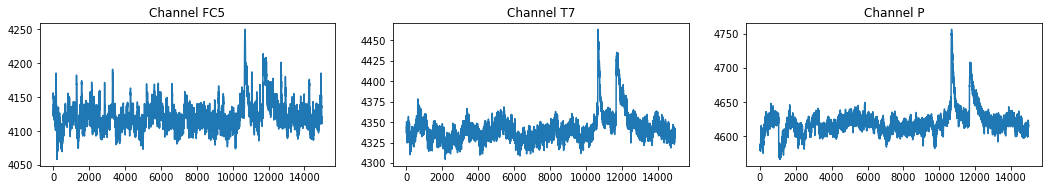

In [8]:
figure, axis = plt.subplots(1,3,figsize = (15,3))
# Channel FC5
axis[0].plot(X, Y3)
axis[0].set_title("Channel FC5")
# Channel T7
axis[1].plot(X, Y4)
axis[1].set_title("Channel T7")
# Channel P
axis[2].plot(X, Y5)
axis[2].set_title("Channel P")
  
# Combine all the operations and display
plt.tight_layout(pad=2.0)
plt.show()

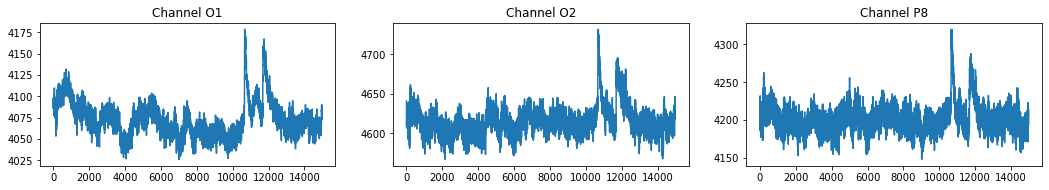

In [9]:
figure, axis = plt.subplots(1,3,figsize = (15,3))

# Channel O1
axis[0].plot(X, Y6)
axis[0].set_title("Channel O1")
# Channel O2
axis[1].plot(X, Y7)
axis[1].set_title("Channel O2")
# Channel P8
axis[2].plot(X, Y8)
axis[2].set_title("Channel P8")
  
# Combine all the operations and display
plt.tight_layout(pad=2.0)
plt.show()

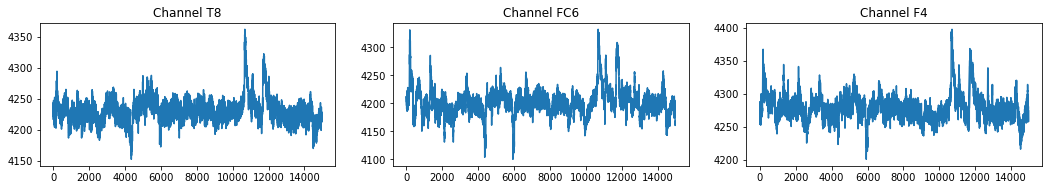

In [10]:
figure, axis = plt.subplots(1,3,figsize = (15,3))
# Channel T8
axis[0].plot(X, Y9)
axis[0].set_title("Channel T8")
# Channel FC6
axis[1].plot(X, Y10)
axis[1].set_title("Channel FC6")
# Channel F4
axis[2].plot(X, Y11)
axis[2].set_title("Channel F4")
  
# Combine all the operations and display
plt.tight_layout(pad=2.0)
plt.show()

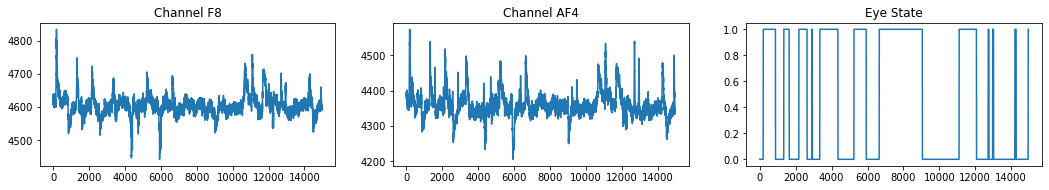

In [11]:
figure, axis = plt.subplots(1,3,figsize = (15,3))
# Channel F8
axis[0].plot(X, Y12)
axis[0].set_title("Channel F8")
# Channel AF4
axis[1].plot(X, Y13)
axis[1].set_title("Channel AF4")
# Eye State (labels)
axis[2].plot(X, Y14)
axis[2].set_title("Eye State")
  
# Combine all the operations and display
plt.tight_layout(pad=2.0)
plt.show()

In [18]:
#use fast ica on my_data, using 10 components
ica = FastICA(n_components=my_data.shape[1]-5)
components = ica.fit_transform(my_data)

In [19]:
components.shape

(14967, 10)

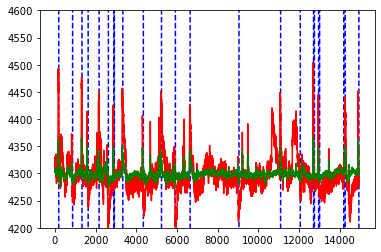

In [28]:
#plot one column vector (channel)(in red) and compare to the state column(blue)
# to see when blinks were occuring, include one component scaled and leveled with
# channel data in order to find blink component

#ith component
#scaled to line up visually with untrasformed data
y = (components[:,7]*1250)+4300
z = my_data[:,0] #Channel AF3 before FastICA
b = my_data[:,14]*5000 # Eye State column
 
# plotting
#plt.title("Line graph")
#plt.xlabel("X axis")
#plt.ylabel("Y axis")
plt.plot(X,b , color ="blue",linestyle = "dashed")
plt.ylim(4200,4600)
plt.plot(X, z, color ="red")
plt.plot(X, y, color ="green")
plt.show()

The visualization above represents channel AF4 before transformation (red),
one component obtained from ica (green), and when blinking was occuring (blue dashed line). This graph allows us to visualize which components are leading to the spikes occuring during blinks.

Most of the data the is contributing to the spikes in the eeg that coincide with the blinks are occuring in components 5 and 7. So these are the components that will need to be removed to eliminate blink data

In [29]:
#remove blinks by setting problem component vectors to 0
components[:, [5,7]] = 0
#
my_data_restored = ica.inverse_transform(components)

In [30]:
my_data_restored.shape

(14967, 15)

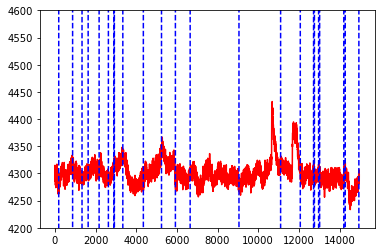

In [31]:
# channel AF3 reconstructed without blink component
plt.plot(X,my_data_restored[:,0],color = "red")
plt.plot(X,b , color ="blue",linestyle = "dashed")
plt.ylim(4200,4600)
plt.show()